In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [152]:
def plot_profiling_bar(file):
    ##plt.figure(figsize=(10, 6))
    #plt.bar(profiling['step'], profiling['square_root'], label='square_root')
    #plt.bar(profiling['step'], profiling['calculateIntersection'], label='calculateIntersection')
    #plt.bar(profiling['step'], profiling['getAngleFromModel'], label='getAngleFromModel')
    plt.bar(file['step'], file['leastSquare'], label='leastSquare')
    plt.bar(file['step'], file['coefficientOfDetermination'], label='coefficientOfDetermination')
    plt.bar(file['step'], file['inliersOutliersMemory'], label='inliersOutliersMemory')
    plt.bar(file['step'], file['inliersOutliers'], label='inliersOutliers')
    #plt.bar(profiling['step'], profiling['squareDistanceBetweenPoints'], label='squareDistanceBetweenPoints')


    plt.xticks(file['step'])
    plt.xlabel('Step')
    plt.ylabel('Valor')
    plt.legend()


    plt.show()

In [153]:
def FPGAout_read(filename):
    data = []
    columns = ['step', 'model', 'bestfit', 'inliers', 'angle', 'distance']

    with open(filename, 'r') as file:
        while True:
            result = {}
            test_case = file.readline().strip()
            if not test_case:
                break
            result['step'] = int(test_case)
            result['model'] = list(map(float, file.readline()[1:-2].split(',')))
            result['bestfit'] = float(file.readline().strip())
            result['inliers'] = int(file.readline().strip())
            result['angle'] = float(file.readline().strip())
            result['distance'] = float(file.readline().strip())
            file.readline()
            data.append(result)

    return pd.DataFrame(data, columns=columns)

In [154]:
path = 'resultados'

In [164]:
padrao_arquivos = os.path.join(path, '*.csv')  # define o padrão para listar todos os arquivos na pasta
lista_arquivos = glob.glob(padrao_arquivos)
lista_arquivos

['resultados\\Profiling.csv',
 'resultados\\Profiling_HFP.csv',
 'resultados\\Profiling_O.csv']

In [166]:
Profiling_HFP = pd.read_csv(lista_arquivos[1])
Profiling_O = pd.read_csv(lista_arquivos[2])
Profiling_HFP - Profiling_O

,step,square_root,calculateIntersection,getAngleFromModel,leastSquare,coefficientOfDetermination,inliersOutliersMemory,inliersOutliers,squareDistanceBetweenPoints
0,0,0,0,0,0,0,20502,0,0
1,0,0,-66,857,349485,-24120,19966,28140,-90
2,0,0,0,0,0,0,20770,0,0
3,0,0,-66,1801,265398,-16000,21038,16800,-84
4,0,0,0,0,0,0,20502,0,0
5,0,0,0,0,0,0,20368,0,0
6,0,0,-66,1870,819256,-58000,29480,60900,-72
7,0,0,0,0,0,0,27068,0,0
8,0,0,-66,1449,335863,-26600,18090,39900,-78
9,0,0,0,0,0,0,27202,0,0


In [147]:
Profiling_O3

,step,square_root,calculateIntersection,getAngleFromModel,leastSquare,coefficientOfDetermination,inliersOutliersMemory,inliersOutliers,squareDistanceBetweenPoints
0,0,0,0,0,0,0,88342,0,0
1,1,1175,327,205538,274211,294327,85709,398802,44700
2,2,0,0,0,0,0,89424,0,0
3,3,1346,327,212771,189140,195810,90226,276025,41694
4,4,0,0,0,0,0,88342,0,0
5,5,0,0,0,0,0,87626,0,0
6,6,1175,327,212836,632240,706110,123574,799854,20792
7,7,0,0,0,0,0,114851,0,0
8,8,491,327,212846,299185,324177,77939,542735,35626
9,9,0,0,0,0,0,115392,0,0


In [167]:
Profiling_O.loc[6]

step                                6
square_root                      1175
calculateIntersection             327
getAngleFromModel              212836
leastSquare                    632240
coefficientOfDetermination     706110
inliersOutliersMemory          123574
inliersOutliers                799854
squareDistanceBetweenPoints     20792
Name: 6, dtype: int64

In [168]:
Profiling_HFP.loc[6]

step                                 6
square_root                       1175
calculateIntersection              261
getAngleFromModel               214706
leastSquare                    1451496
coefficientOfDetermination      648110
inliersOutliersMemory           153054
inliersOutliers                 860754
squareDistanceBetweenPoints      20720
Name: 6, dtype: int64

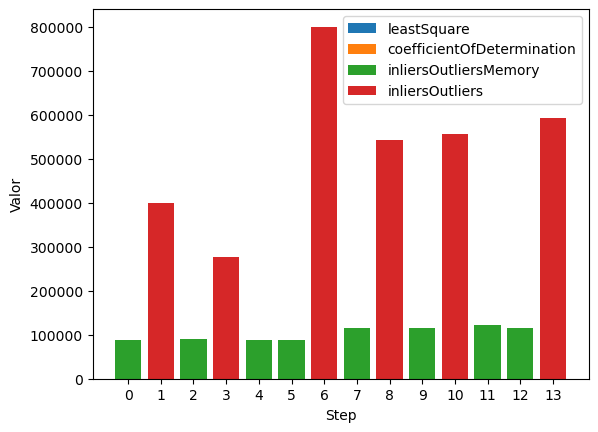

In [169]:
plot_profiling_bar(Profiling_O)

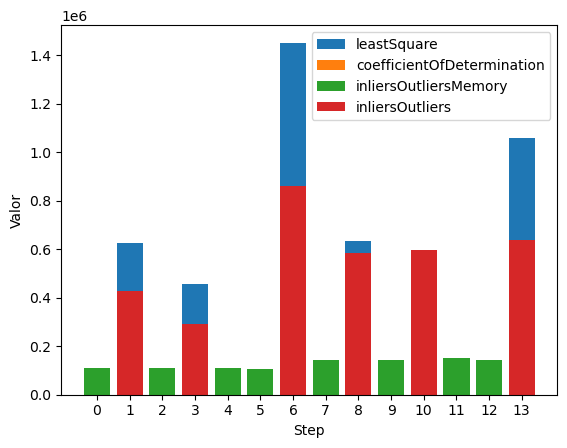

In [170]:
plot_profiling_bar(profiling_HFP)

In [42]:
valor_minimo = np.min(profiling[profiling['coefficientOfDetermination'] != 0]['coefficientOfDetermination'])
valor_minimo

4609508

In [27]:
FPGA_out_PC = FPGAout_read(lista_arquivos[1])

In [28]:
FPGA_out_PC

,step,model,bestfit,inliers,angle,distance
0,0,"[0.0, 25.0]",inf,0,0.000000,50.000000
1,1,"[1.849611391923474, -9.072286537311804]",0.153965,56,-1.075157,18.421322
2,2,"[0.0, 25.0]",inf,0,-1.075157,50.000000
3,3,"[0.4267146348356053, 15.852611933824722]",0.361517,28,-1.478479,21.436781
4,4,"[0.0, 25.0]",inf,0,-1.478479,50.000000
5,5,"[0.0, 25.0]",inf,0,-1.478479,50.000000
6,6,"[-0.7649217947693504, 34.272184980922894]",0.054745,114,-0.825496,12.121742
7,7,"[0.0, 25.0]",inf,0,-0.825496,50.000000
8,8,"[1.1687408622449298, 24.289339978544156]",0.133508,85,-1.688544,0.608056
9,9,"[0.0, 25.0]",inf,0,-1.688544,50.000000


In [29]:
FPGA_out_NIOS = FPGAout_read(lista_arquivos[2])

In [30]:
FPGA_out_NIOS

,step,model,bestfit,inliers,angle,distance
0,0,"[0.0, 25.0]",inf,153,0.000000,50.000000
1,1,"[1.9253, -11.349117]",0.115460,67,-1.091750,18.141445
2,2,"[0.0, 25.0]",inf,155,0.000000,50.000000
3,3,"[0.481072, 12.98444]",0.236668,40,-0.448391,24.021948
4,4,"[0.0, 25.0]",inf,153,0.000000,50.000000
5,5,"[0.0, 25.0]",inf,152,0.000000,50.000000
6,6,"[-0.770371, 33.592865]",0.029266,145,0.656412,11.000189
7,7,"[0.0, 25.0]",inf,202,0.000000,50.000000
8,8,"[1.203124, 23.710875]",0.116742,95,-0.877336,1.416667
9,9,"[0.0, 25.0]",inf,203,0.000000,50.000000
